In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#by hand, runs faster
def compute_return(y, r_type="log", h=1):
    
    # exclude first h observations
    y2 = y[h:]
    # exclude last h observations
    y1 = y[:-h]
    
    if r_type == "log":
        ret = np.concatenate(([np.nan]*h, 100 * (np.log(y2) - np.log(y1))))
    else:
        ret = np.concatenate(([np.nan]*h, 100 * (y2-y1)/y1))
        
    return ret

#pythonic alternative (however: slower) to do the same thing:
def compute_return_2(df, r_type="log", h=1):
    
    if r_type == "log":
        return (np.log(df) - np.log(df.shift(h))) * 100
    else:
        return ((df-df.shift(h))/df) * 100 

In [9]:
import yfinance as yf

msft = yf.Ticker("^GDAXI")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ret1,ret2,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5
Date,,,,,,,,,,,,,,,,,
1988-01-08 00:00:00+01:00,1026.689941,1026.689941,1026.689941,1026.689941,0,0.0,0.0,1.197370,2.034796,3.024763,7.082493,2.116340,1014.469971,1006.010010,996.099976,956.489990,1005.190002
1988-01-11 00:00:00+01:00,987.520020,987.520020,987.520020,987.520020,0,0.0,0.0,-3.889849,-2.692479,-1.855053,-0.865086,3.192645,1026.689941,1014.469971,1006.010010,996.099976,956.489990
1988-01-12 00:00:00+01:00,986.890015,986.890015,986.890015,986.890015,0,0.0,0.0,-0.063817,-3.953666,-2.756296,-1.918870,-0.928903,987.520020,1026.689941,1014.469971,1006.010010,996.099976
1988-01-13 00:00:00+01:00,965.770020,965.770020,965.770020,965.770020,0,0.0,0.0,-2.163287,-2.227104,-6.116953,-4.919583,-4.082157,986.890015,987.520020,1026.689941,1014.469971,1006.010010
1988-01-14 00:00:00+01:00,974.460022,974.460022,974.460022,974.460022,0,0.0,0.0,0.895776,-1.267511,-1.331328,-5.221176,-4.023806,965.770020,986.890015,987.520020,1026.689941,1014.469971


In [10]:
hist = msft.history(period="max")

In [11]:
for i in range(5):
    hist["ret"+str(i+1)] = compute_return(hist["Close"].values, h=i+1)

In [12]:
hist.tail()

In [7]:
#quantile levels
tau = [.025, .25, .5, .75, .975]

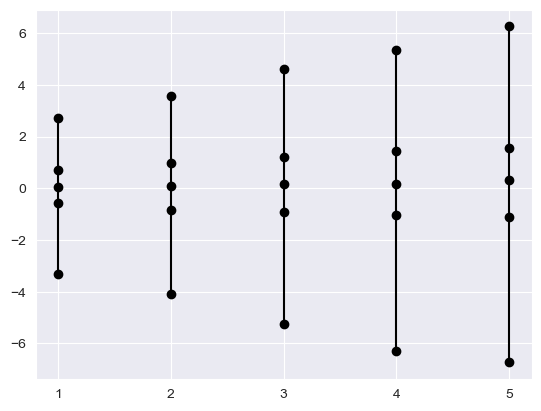

In [13]:
#define prediction array
#cols are quantile levels, rows are horizons
pred_baseline = np.zeros((5,5))

In [9]:
last_t = 1000

for i in range(5):
    ret_str = "ret"+str(i+1)
    
    pred_baseline[i,:] = np.quantile(hist[ret_str].iloc[-last_t:], q=tau)

Visualize the results

In [15]:
x = np.arange(5)+1
_ = plt.plot(x,pred_baseline, ls="", marker="o", c="black")
_ = plt.xticks(x, x)
_ = plt.plot((x,x),(pred_baseline[:,0], pred_baseline[:,-1]),c='black')

Create Submission DataFrame

In [16]:
df_sub = pd.DataFrame({
    "target": "DAX",
    "horizon": [str(i) + " day" for i in (1,2,5,6,7)],
    "q0.025": pred_baseline[:,0],
    "q0.25": pred_baseline[:,1],
    "q0.5": pred_baseline[:,2],
    "q0.75": pred_baseline[:,3],
    "q0.975": pred_baseline[:,4]})
df_sub

In [12]:
from datetime import datetime
date_str = datetime.today().strftime('%Y%m%d')

In [13]:
#need to change this
PATH = "./"

df_sub.to_csv(PATH+"/"+date_str+"DAX_benchmark.csv")